<a href="https://colab.research.google.com/github/emanuel379/Analise-Multivariada-e-Aprendizado-Nao-Supervisionado-/blob/main/An%C3%A1lise_de_componentes_principais(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Códigos**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

caminho = 'https://raw.githubusercontent.com/cibelerusso/AnaliseMultivariadaEAprendizadoNaoSupervisionado/master/Dados/decathlon.csv'
df = pd.read_csv(caminho, index_col=0)
df.head(30)

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.70,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.50,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.20,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.10,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.40,5,8036,Decastar
WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.10,6,8030,Decastar
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.00,7,8004,Decastar
McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.10,8,7995,Decastar
MARTINEAU,11.64,6.81,14.57,1.95,50.14,14.93,47.60,4.92,52.33,262.10,9,7802,Decastar
HERNU,11.37,7.56,14.41,1.86,51.10,15.06,44.99,4.82,57.19,285.10,10,7733,Decastar


In [ ]:
# 1. Analise a matriz de correlações dos dados.

# Cálculo da matriz de correlações
corr = df.iloc[:,0:9].corr()
corr

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline
100m,1.000000,-0.598678,-0.356482,-0.246253,0.520298,0.579889,-0.221708,-0.082537,-0.157746
Long.jump,-0.598678,1.000000,0.183304,0.294644,-0.602063,-0.505410,0.194310,0.204014,0.119759
Shot.put,-0.356482,0.183304,1.000000,0.489212,-0.138433,-0.251616,0.615768,0.061182,0.374956
High.jump,-0.246253,0.294644,0.489212,1.000000,-0.187957,-0.283289,0.369218,-0.156181,0.171880
400m,0.520298,-0.602063,-0.138433,-0.187957,1.000000,0.547988,-0.117879,-0.079292,0.004232
110m.hurdle,0.579889,-0.505410,-0.251616,-0.283289,0.547988,1.000000,-0.326201,-0.002704,0.008743
Discus,-0.221708,0.194310,0.615768,0.369218,-0.117879,-0.326201,1.000000,-0.150072,0.157890
Pole.vault,-0.082537,0.204014,0.061182,-0.156181,-0.079292,-0.002704,-0.150072,1.000000,-0.030001
Javeline,-0.157746,0.119759,0.374956,0.171880,0.004232,0.008743,0.157890,-0.030001,1.000000


<Axes: >

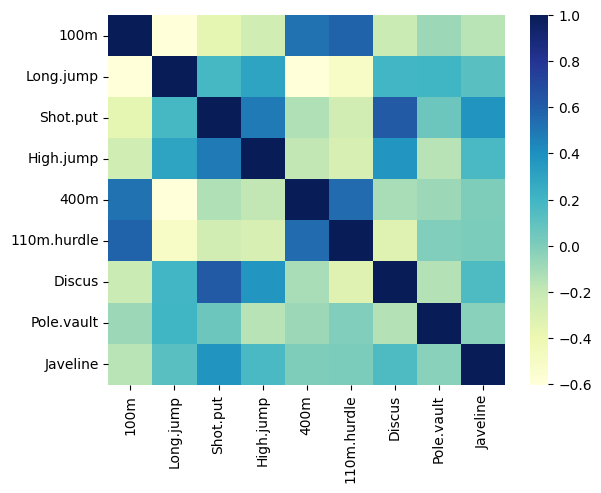

In [ ]:
# Mapa de calor das correlações

sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="YlGnBu")

In [ ]:
# Análise de Componentes Principais
# 2. Decomponha a matriz de variâncias e covariâncias em componentes principais.


X = np.matrix(df.iloc[:,0:10])
S = np.cov(np.transpose(X))
X = np.asarray(X)

np.diagonal(S)

array([6.91810976e-02, 1.00110000e-01, 6.79681220e-01, 7.91219512e-03,
       1.33044878e+00, 2.22584878e-01, 1.14098352e+01, 7.72839024e-02,
       2.32981930e+01, 1.36264701e+02])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
pca

PCA(n_components=8)

In [ ]:
pca.fit(X)

PCA(n_components=8)

In [ ]:
# Pesos das componentes principais

pca.components_[0,:]

array([-1.28080400e-03, -9.50593693e-04,  8.04474909e-03, -3.21942507e-04,
        3.95670085e-02,  1.26099822e-03,  7.79032346e-02,  5.70956842e-03,
       -8.59485398e-02,  9.92409609e-01])

In [ ]:
# 3. Quantas componentes explicam ao menos 90% da variabilidade dos dados?

# Variância das componentes principais

pca.explained_variance_ratio_

np.round(pca.explained_variance_ratio_,2)

array([0.8 , 0.14, 0.06, 0.01, 0.  , 0.  , 0.  , 0.  ])

# **Exercícios** - Questionário 4

**3)**

In [ ]:
# Análise de Componentes Principais
# 2. Decomponha a matriz de variâncias e covariâncias em componentes principais.


X = np.matrix([[8, 7],[7, 7]])
S = np.cov(np.transpose(X))
X = np.asarray(X)

np.diagonal(S)

array([0.5, 0. ])

In [ ]:
pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [ ]:
pca.fit(X)

PCA(n_components=2)

In [ ]:
pca.components_[0,:]

array([-1., -0.])

In [ ]:
# 3. Quantas componentes explicam ao menos 90% da variabilidade dos dados?

# Variância das componentes principais

pca.explained_variance_ratio_

array([1., 0.])

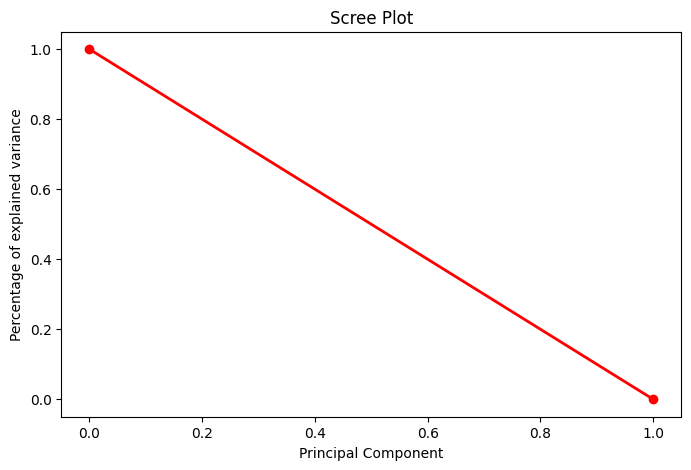

In [ ]:
fig = plt.figure(figsize=(8,5))

plt.plot(pca.explained_variance_ratio_,  'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of explained variance')

plt.show()

**6)**

In [ ]:
# Análise de Componentes Principais
# 2. Decomponha a matriz de variâncias e covariâncias em componentes principais.


X = np.matrix([[5, 2, 0],[2, 2, 0],[0, 0, 2]])
S = np.cov(np.transpose(X))
X = np.asarray(X)

np.diagonal(S)

array([6.33333333, 1.33333333, 1.33333333])

In [ ]:
pca = PCA(n_components=3)
pca

PCA(n_components=3)

In [ ]:
pca.fit(X)

PCA(n_components=3)

In [ ]:
# 3. Quantas componentes explicam ao menos 90% da variabilidade dos dados?

# Variância das componentes principais

pca.explained_variance_ratio_

array([9.19435246e-01, 8.05647536e-02, 1.34599365e-33])